In [219]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline
from datetime import datetime
import time

In [220]:
# Dataset taken from St.Jude website
df = pd.read_excel('file://localhost/Users/mattcurrey/Documents/2016 St. Jude Marathon Results.xlsx')
df.Pace = df.Pace.astype(str).str[:-3].astype(object)
df['extra'] = '00:'
df['Pace'] = df.extra+df.Pace
del df['extra']

In [221]:
# Convert Racetime to Seconds for vizualisation
def dtt(t):
        h = datetime.combine(date.min, t) - datetime.min
        return h.seconds

In [222]:
df['Time In Seconds'] = df.Time.apply(dtt)

In [223]:
cols = ['Place','First Name', 'Last Name','Age','Sex','Time','Time In Seconds','Pace','City','State']
df = df[cols]
df.head()

,Place,First Name,Last Name,Age,Sex,Time,Time In Seconds,Pace,City,State
0,1,Jason,Howell,34,M,02:38:06,9486,00:06:03,Evansville,IN
1,2,Adam,Higham,31,M,02:39:32,9572,00:06:06,Collierville,TN
2,3,Olaf,Schulz,39,M,02:45:46,9946,00:06:20,Lakeland,TN
3,4,Janek,Wasserman,36,M,02:47:17,10037,00:06:24,Birmingham,AL
4,5,Jason,Land,39,M,02:51:22,10282,00:06:33,Newburgh,IN


In [224]:
df.describe().iloc[:,1]

count    2504.000000
mean       39.502796
std        10.663336
min        16.000000
25%        32.000000
50%        39.000000
75%        47.000000
max        85.000000
Name: Age, dtype: float64

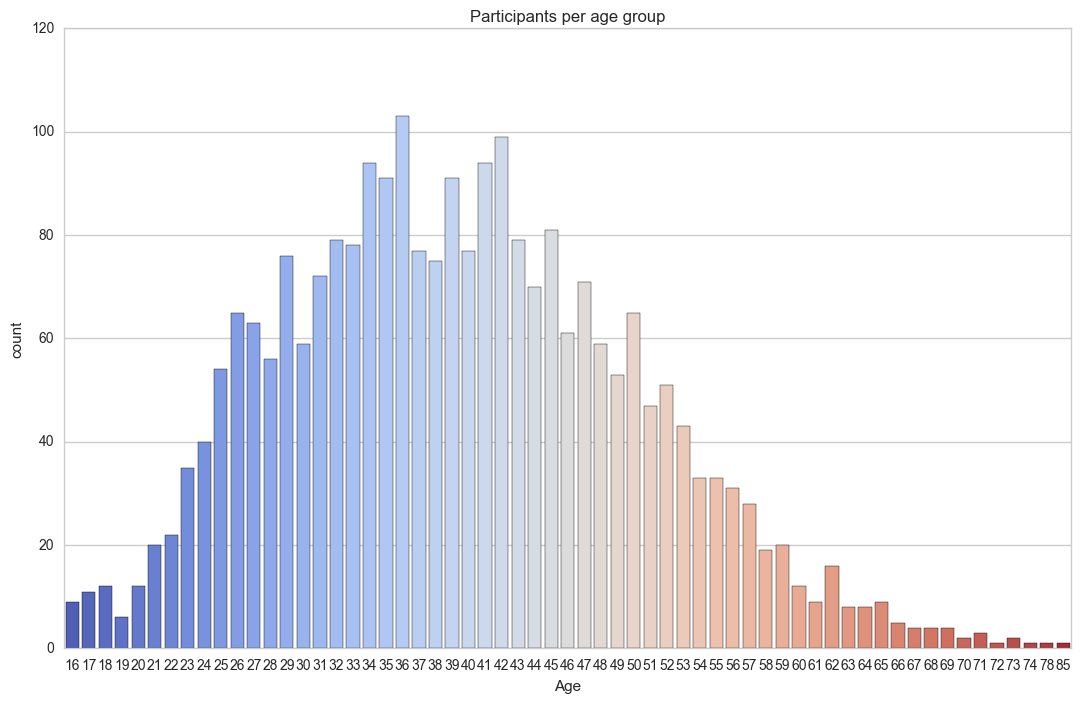

In [225]:
# Finishers by Age
g = sns.countplot('Age', data=df, palette="coolwarm")
g.figure.set_size_inches(13,8)
g.set_title("Participants per age group")

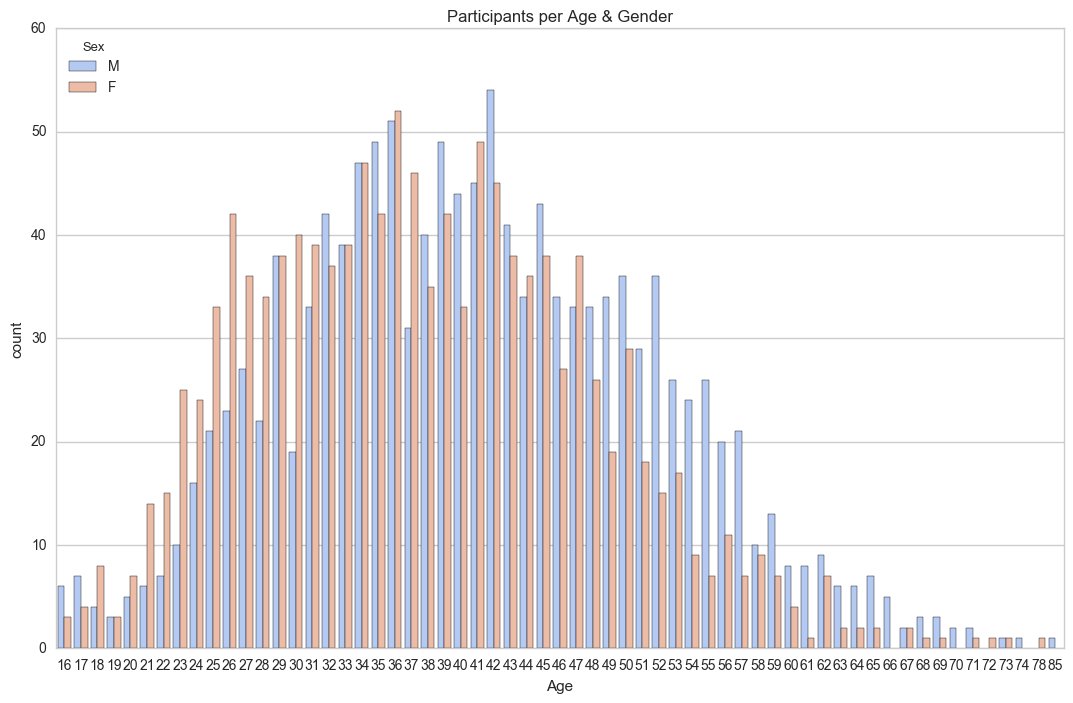

In [226]:
# Finishers by Age and Gender
g = sns.countplot('Age', data=df, palette="coolwarm", hue='Sex')
g.figure.set_size_inches(13,8)
g.set_title("Participants per Age & Gender")

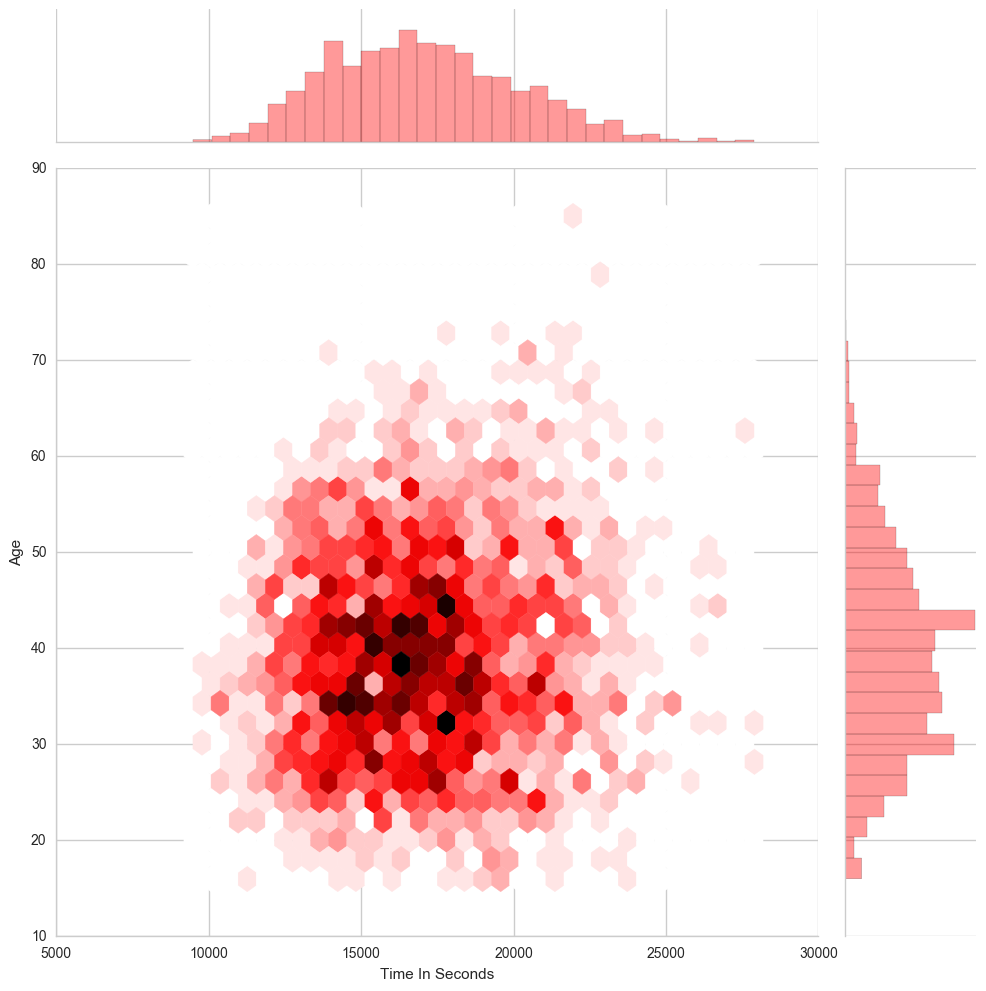

In [229]:
g = sns.jointplot( x=df['Time In Seconds'], y=df['Age'], stat_func=None, kind='hex', color="r", size=10)

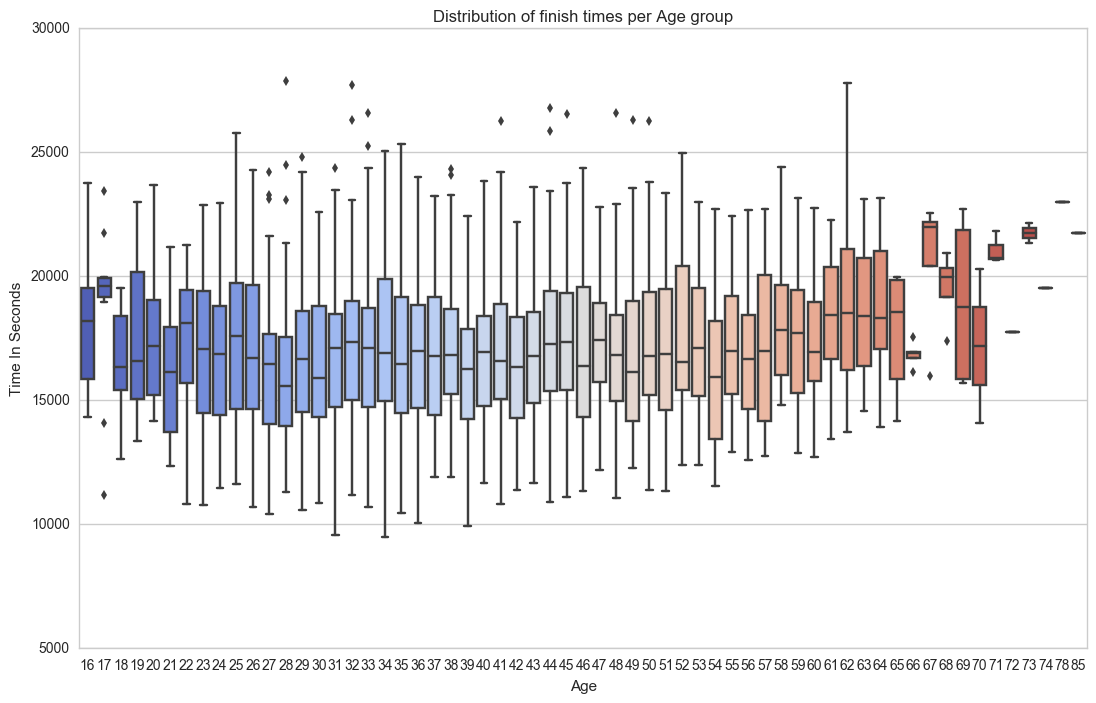

In [230]:
g = sns.boxplot(df['Age'], df['Time In Seconds'], palette="coolwarm")
g.figure.set_size_inches(13,8)
g.set_title("Distribution of finish times per Age group")

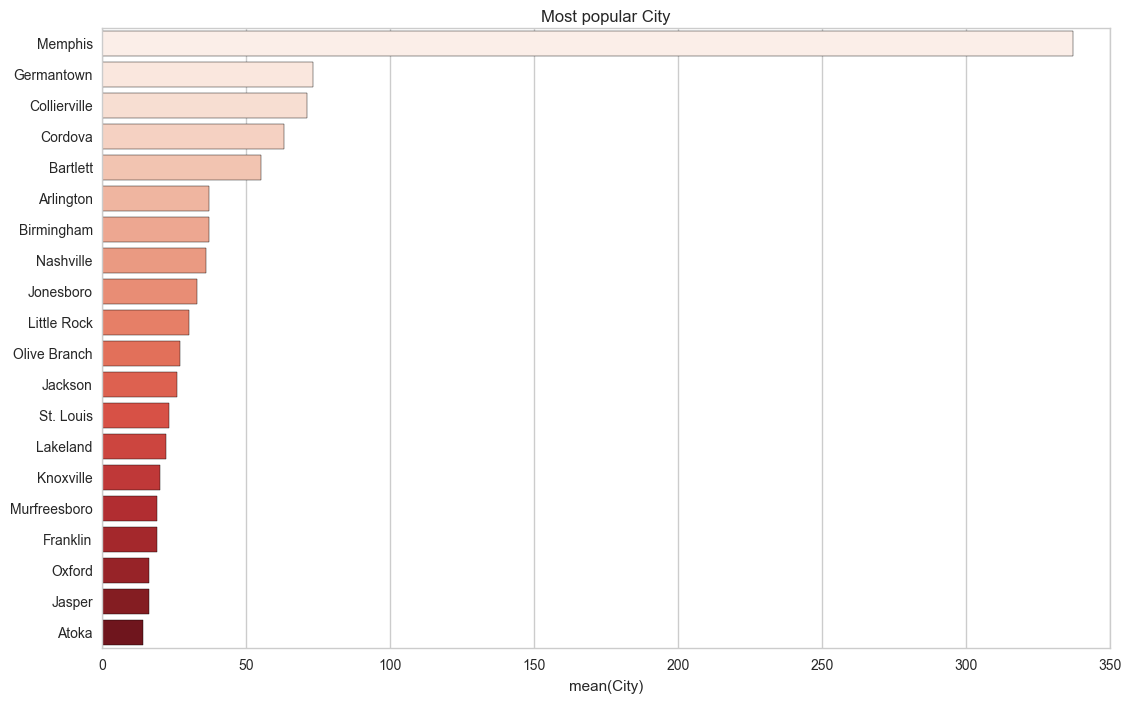

In [231]:
s = df['City'].value_counts().head(20)
g = sns.barplot(s, s.index, palette='Reds')
g.figure.set_size_inches(13,8)
g.set_title("Most popular City")

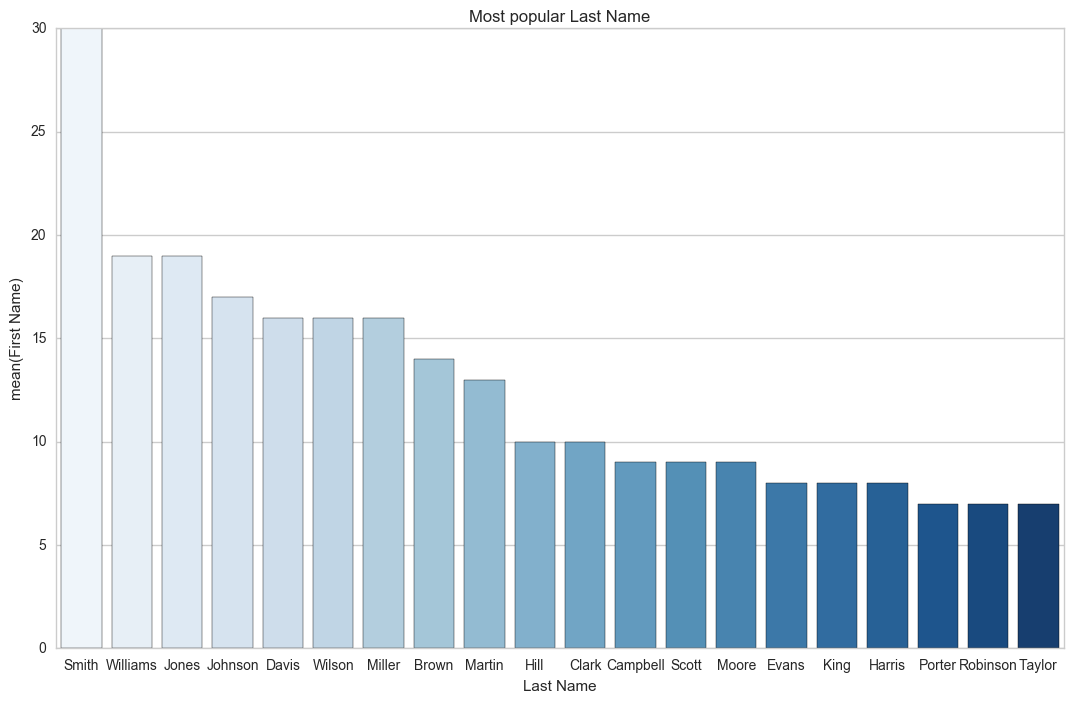

In [232]:
s = df.groupby('Last Name').count()['First Name'].sort_values(ascending=False).head(20)
g = sns.barplot(s.index, s, palette='Blues')
g.figure.set_size_inches(13,8)
g.set_title("Most popular Last Name")

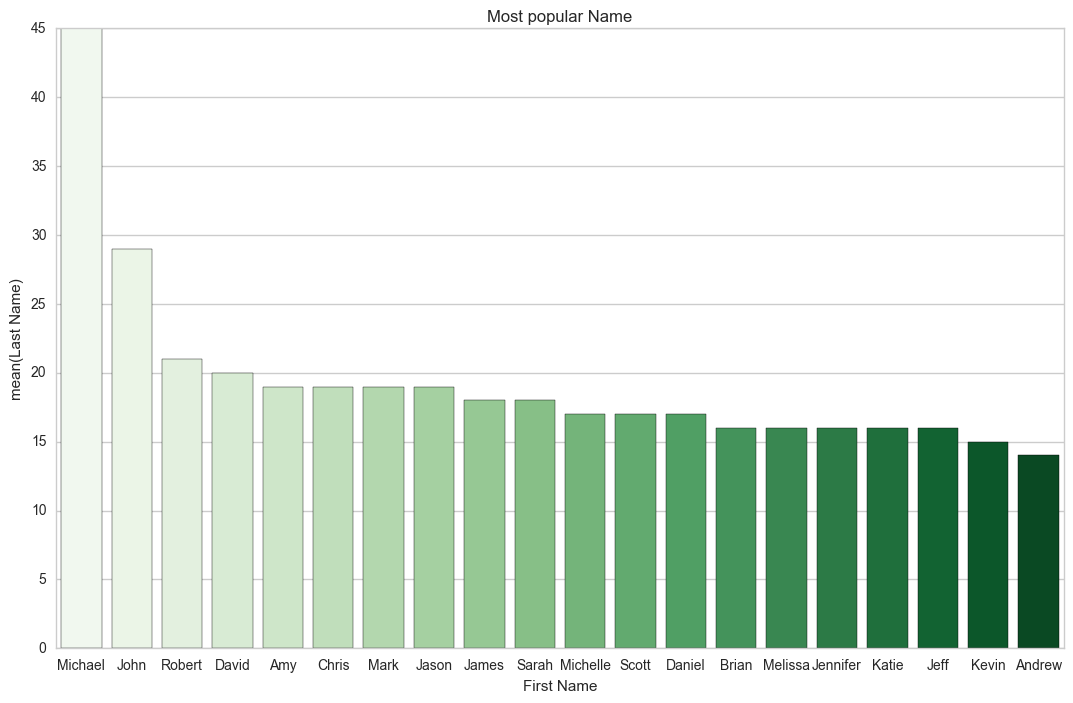

In [233]:
s = df.groupby('First Name').count()['Last Name'].sort_values(ascending=False).head(20)
g = sns.barplot(s.index, s, palette='Greens')
g.figure.set_size_inches(13,8)
g.set_title("Most popular Name")

In [ ]:
# References
# https://www.kaggle.com/mcurrey/boston-marathon-2016-finishers-analysis-726078/editnb